In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load delinquency data
df = pd.read_excel("./raw_data/Fed_DR_2000Q1_2025Q4.xlsx",
            skiprows=6,usecols=[0,3,8])
df_fed = df.rename(columns={"Time Period": "Quarter", "STFBQDB%STFBAILB_XEOP_XS1A2_MA.Q": "Wholesale_Proxy_DR", "STFBQDCC%STFBAILCC_XEOP_XS1A2_MA.Q": "Retail_Proxy_DR"})   

df_fed['Quarter_dt'] = pd.PeriodIndex(df_fed['Quarter'], freq='Q').to_timestamp()

df_fed = df_fed.set_index('Quarter_dt').sort_index()
df_fed = df_fed.drop(columns=['Quarter'])

for col in df_fed.columns:
    df_fed[col] = (
        df_fed[col]
        .astype(str)
        .str.replace('%','', regex=False)
    )
    df_fed[col] = pd.to_numeric(df_fed[col], errors='coerce') / 100

df_fed      

,Wholesale_Proxy_DR,Retail_Proxy_DR
Quarter_dt,,
2000-01-01,0.0191,0.0436
2000-04-01,0.0208,0.0449
2000-07-01,0.0218,0.0450
2000-10-01,0.0237,0.0448
2001-01-01,0.0259,0.0467
...,...,...
2024-07-01,0.0109,0.0308
2024-10-01,0.0120,0.0297
2025-01-01,0.0118,0.0293


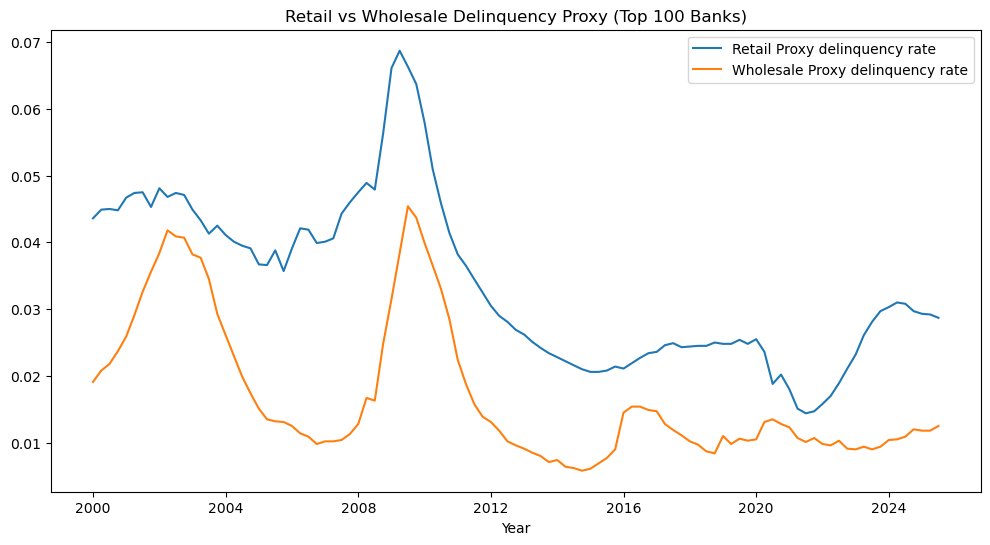

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df_fed.index, df_fed["Retail_Proxy_DR"], label="Retail Proxy delinquency rate")
plt.plot(df_fed.index, df_fed["Wholesale_Proxy_DR"], label="Wholesale Proxy delinquency rate")

plt.legend()
plt.xlabel("Year")
plt.title("Retail vs Wholesale Delinquency Proxy (Top 100 Banks)")
plt.show()


In [11]:
OUTPUT_PATH = "./output/Fed_DR.csv"

df_fed.to_csv(OUTPUT_PATH, index=True)

print(f"Saved cleaned Fed DR data to {OUTPUT_PATH}")

Saved cleaned Fed DR data to ./output/Fed_DR.csv
